In [1]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [2]:
# Load data.
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(io.BytesIO(requests.get(URL).content), index_col=0, skiprows=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


/var/folders/5y/gx5kw0w5145_rxkf63cvr7lm0000gp/T/ipykernel_36540/2479168830.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation=45)


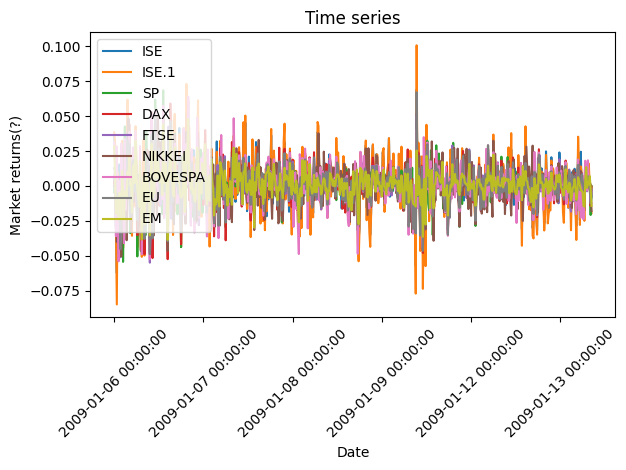

In [3]:
# Visualize time series.
fig, ax = plt.subplots()
ax.set_title("Time series")
ax.set_xlabel("Date")
ax.set_ylabel("Market returns(?)")
for col in data.columns:
    ax.plot(range(len(data[col])), data[col], label=col)
ax.set_xticklabels(data.index, rotation=45)
fig.tight_layout()
plt.legend()
plt.show()

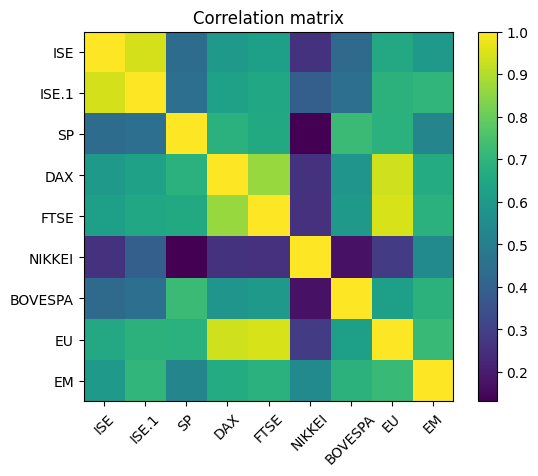

In [4]:
# Visualize correlation coefficient matrix.
fig, ax = plt.subplots()
ax.set_title("Correlation matrix")
cbar = ax.imshow(np.corrcoef(data.to_numpy().T))
ax.set_xticks(range(len(data.columns)))
ax.set_yticks(range(len(data.columns)))
ax.set_xticklabels(data.columns, rotation=45)
ax.set_yticklabels(data.columns)
fig.colorbar(cbar, ax=ax, fraction=.045)
plt.show()

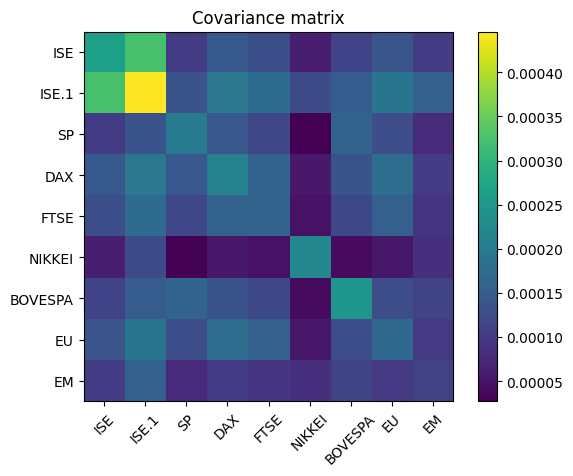

In [5]:
# Visualize covariance matrix.
data_npy = data.to_numpy()
data_bar = data_npy - np.mean(data_npy, axis=0)
fig, ax = plt.subplots()
ax.set_title("Covariance matrix")
cov = (data_bar.T @ data_bar) / (data_bar.shape[0] - 1)
cbar = ax.imshow(cov)
ax.set_xticks(range(len(data.columns)))
ax.set_yticks(range(len(data.columns)))
ax.set_xticklabels(data.columns, rotation=45)
ax.set_yticklabels(data.columns)
fig.colorbar(cbar, ax=ax, fraction=.045)
plt.show()

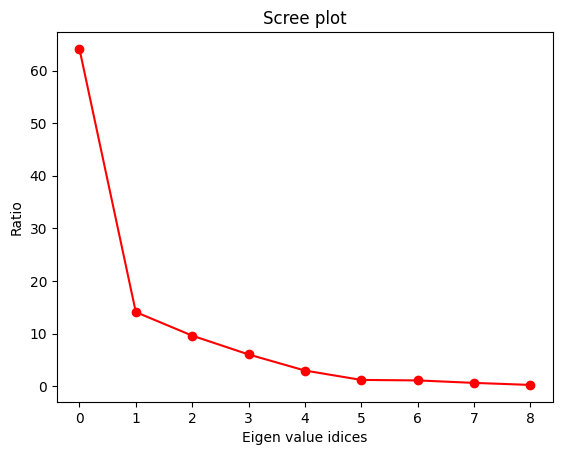

In [6]:
# Visualize scree plot.
evals, evecs = np.linalg.eig(cov)
sorted_idx = np.argsort(evals)[::-1]
evals = evals[sorted_idx]
evecs = evecs[:, sorted_idx]

ratio = 100 * evals / np.sum(evals)
fig, ax = plt.subplots(1, 1)
ax.set_title("Scree plot")
ax.set_xlabel("Eigen value idices")
ax.set_ylabel("Ratio")
ax.plot(range(len(evals)), ratio, "ro-")
plt.show()

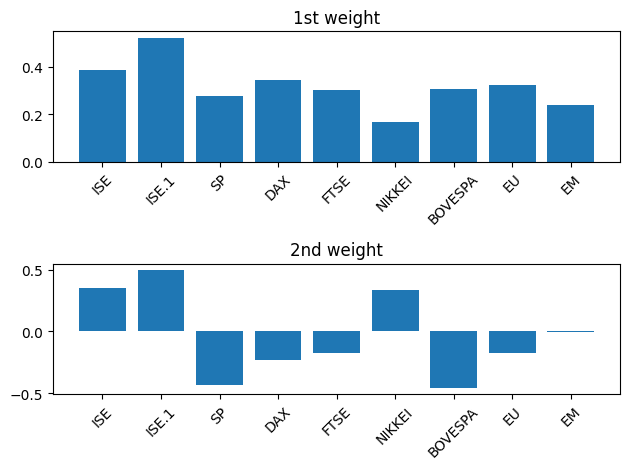

In [7]:
# Visualize weights (eigen vector) of first two eigen values.
fig, ax = plt.subplots(2, 1)
ax[0].set_title("1st weight")
ax[0].bar(range(evecs[:, 0].shape[0]), evecs[:, 0])
ax[0].set_xticks(range(evecs[:, 0].shape[0]))
ax[0].set_xticklabels(data.columns, rotation=45)
ax[1].set_title("2nd weight")
ax[1].bar(range(evecs[:, 1].shape[0]), evecs[:, 1])
ax[1].set_xticks(range(evecs[:, 1].shape[0]))
ax[1].set_xticklabels(data.columns, rotation=45)
fig.tight_layout()
plt.show()

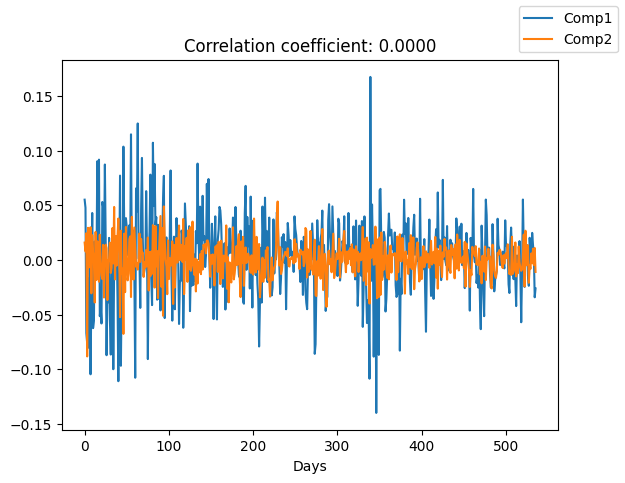

In [8]:
comp1 = (data_npy @ evecs[:, 0]).reshape(-1, 1)
comp2 = (data_npy @ evecs[:, 1]).reshape(-1, 1)
corr = np.corrcoef(np.hstack((comp1, comp2)).T)[0, 1]
fig, ax = plt.subplots(1, 1)
ax.set_title(f"Correlation coefficient: {corr:.4f}")
ax.plot(range(comp1.shape[0]), comp1, label="Comp1")
ax.plot(range(comp2.shape[0]), comp2, label="Comp2")
ax.set_xlabel("Days")
fig.legend()
plt.show()